# Private Multiplicative Weights for Histograms

In [1]:
using PrivateMultiplicativeWeights
using Distributions
using PyPlot

## Example: Approximating a mixture of two Gaussians.

We start from a continuous mixture of two Gaussians.

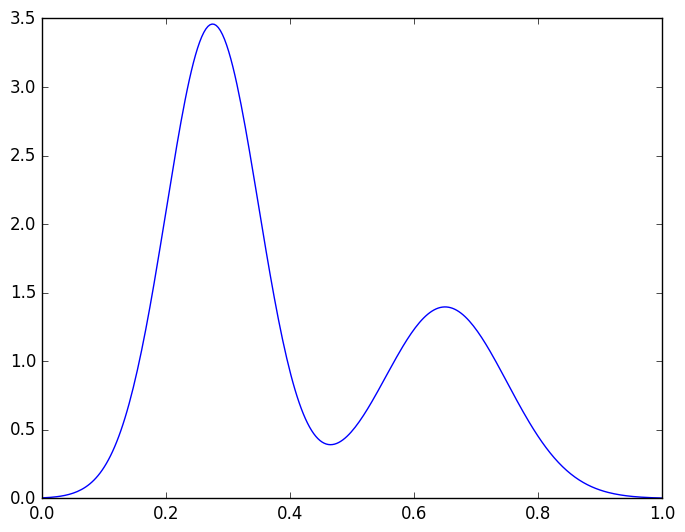

In [3]:
d_continuous = Truncated(MixtureModel(Normal, [(.275, .075), (.65, .1)], [0.65, 0.35]), 0, 1)
xs = linspace(d_continuous.lower, d_continuous.upper, 300)
ys = pdf(d_continuous, xs)
plot(xs, ys);

### Non-private histogram approximation

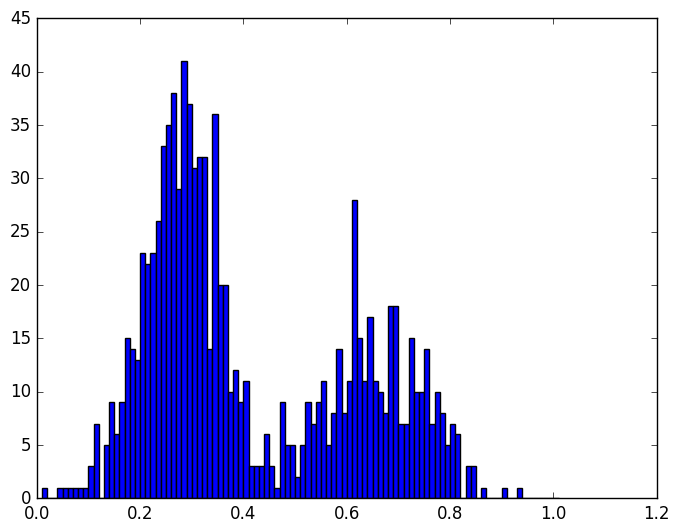

In [4]:
num_samples = 1000
domain_size = 100
samples = rand(d_continuous, num_samples)

function histogram_from_sample(samples, num_bins)
    @assert 0 <= minimum(samples)
    @assert maximum(samples) <= 1
    h = zeros(num_bins)
    for x in round(Int64, samples*num_bins)
        h[x] += 1
    end
    collect(1:num_bins)/num_bins, h
end

xs, ys = histogram_from_sample(samples, domain_size)
bar(xs, ys, width=1/domain_size);

### Private histogram approximation

Obtaining a private approximation is as easy as running the following command.

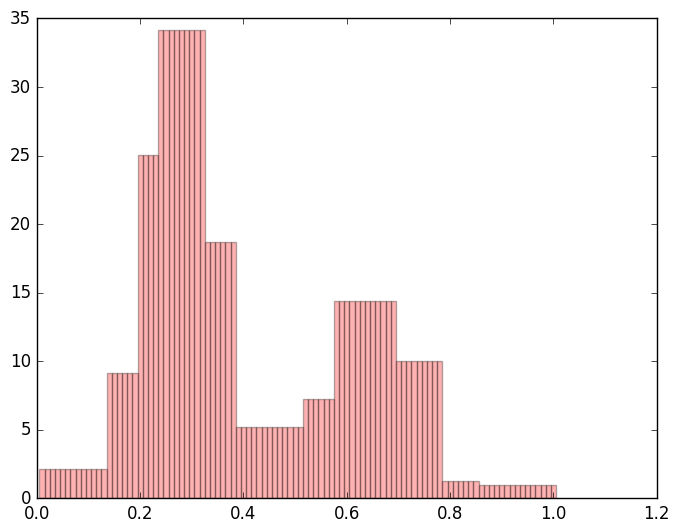

In [6]:
mw = mwem(SeriesRangeQueries(domain_size), Histogram(ys/sum(ys), num_samples));
bar(xs, mw.synthetic.weights*num_samples, align="center", color="red", alpha=0.3, width=1/domain_size);

Above we ran `mwem` with the default parameters corresponding to `10` iterations and `epsilon=1.0` per iteration. We can adjust these parameters as follows:

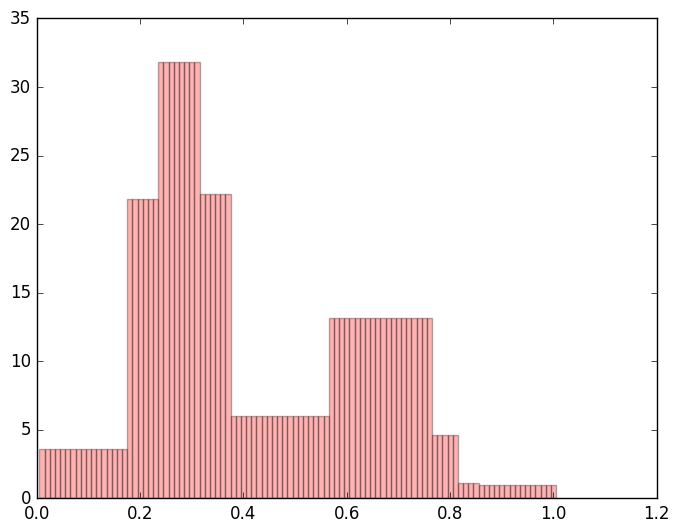

In [13]:
mw = mwem(SeriesRangeQueries(domain_size), Histogram(ys/sum(ys), num_samples), MWParameters(epsilon=0.1, iterations=8));
bar(xs, mw.synthetic.weights*num_samples, align="center", color="red", alpha=0.3, width=1/domain_size);

### Side-by-side comparison

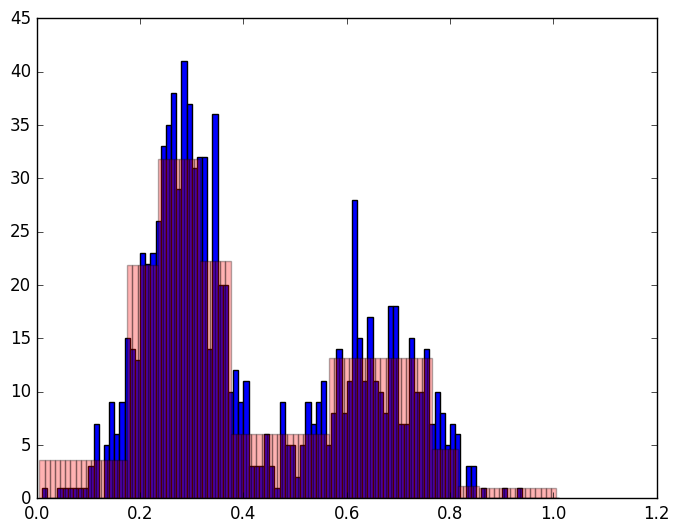

In [14]:
bar(xs, ys, 1/domain_size);
bar(xs, mw.synthetic.weights*num_samples, align="center", color="red", alpha=0.3, width=1/domain_size);